In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/lamvi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Zelensky
We want to see the Sentiment regarding Zelensky over time and how that has changed.
Seperate

In [2]:
df = pd.read_csv('df_all_processed.csv')

In [3]:
df.head()

,Unnamed: 0,URL,Datetime,Title,Text,Affiliation,processed_text,processed_filtered_text,lemma_text
0,9908,world/2021/aug/03/belarus-exile-group-leader-v...,2021-08-03,Belarus exile group leader Vitaly Shishov foun...,The head of a Kyiv-based non-profit organisati...,Guardian,head Kyiv-based non-profit organisation helps ...,head kyiv based non profit organisation helps ...,head kyiv base non profit organisation help be...
1,9909,world/2021/aug/03/uk-on-your-side-boris-johnso...,2021-08-03,"UK is on your side, Boris Johnson tells Belaru...",The UK is on the side of Belarusian opposition...,Guardian,UK side Belarusian opposition leaders trying b...,uk side belarusian opposition leaders trying b...,uk side belarusian opposition leader try bring...
2,9907,world/2021/aug/03/anger-in-turkey-grows-over-g...,2021-08-03,Anger in Turkey grows over government’s handli...,People across Turkey are looking for answers a...,Guardian,People across Turkey looking answers summer wi...,people across turkey looking answers summer wi...,people across turkey look answer summer wildfi...
3,9911,world/2021/aug/07/greek-firefighter-killed-ath...,2021-08-07,Greek firefighter killed and 20 injured as fir...,A volunteer firefighter has been killed in a b...,Guardian,volunteer firefighter killed blaze threatening...,volunteer firefighter killed blaze threatening...,volunteer firefighter kill blaze threaten gree...
4,9910,world/2021/aug/07/belarus-danger-belarusian-di...,2021-08-07,Belarus exiles fear the long arm of the vengef...,It is a fraught and dangerous time to be a Bel...,Guardian,fraught dangerous time Belarusian activist dis...,fraught dangerous time belarusian activist dis...,fraught dangerous time belarusian activist dis...


In [4]:
df.shape

(14223, 9)

In [5]:
# Function to extract sentences with the word 'Zelensky'
def extract_sentences_with_zelensky(row):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', row['Text'])
    sentences_with_zelensky = [sentence for sentence in sentences if 'Zelensky' in sentence]
    return pd.Series({'date': row['Datetime'], 'affiliation': row['Affiliation'], 'sentence': sentences_with_zelensky})

# Apply the function to each row
result_df = df.apply(extract_sentences_with_zelensky, axis=1).explode('sentence').reset_index(drop=True)

In [6]:
result_df

,date,affiliation,sentence
0,2021-08-03,Guardian,NaN
1,2021-08-03,Guardian,NaN
2,2021-08-03,Guardian,NaN
3,2021-08-07,Guardian,NaN
4,2021-08-07,Guardian,NaN
...,...,...,...
17727,2023-12-07,BreitBart,President Zelensky dispatched his chief of sta...
17728,2023-12-07,BreitBart,"In a full court press, President Zelensky sent..."
17729,2023-12-07,BreitBart,"However, Texas Republican Senator John Cornyn ..."
17730,2023-12-07,BreitBart,"Orbán, who has been a lone voice in the bloc c..."


In [7]:
# Drop rows with NaN values
result_df = result_df.dropna()

# Display the result
result_df

,date,affiliation,sentence
76,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...
77,2021-10-29,Guardian,I’m asking regional authorities to wake up and...
101,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...
102,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...
135,2021-12-07,Guardian,Direct engagement with the administration of V...
...,...,...,...
17727,2023-12-07,BreitBart,President Zelensky dispatched his chief of sta...
17728,2023-12-07,BreitBart,"In a full court press, President Zelensky sent..."
17729,2023-12-07,BreitBart,"However, Texas Republican Senator John Cornyn ..."
17730,2023-12-07,BreitBart,"Orbán, who has been a lone voice in the bloc c..."


In [8]:
result_df["row_id"] = result_df.index
result_df.head(10)

/var/folders/nv/900170jd77g07hdgq0vvdx300000gn/T/ipykernel_4853/3253491269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df["row_id"] = result_df.index


,date,affiliation,sentence,row_id
76,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...,76
77,2021-10-29,Guardian,I’m asking regional authorities to wake up and...,77
101,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...,101
102,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...,102
135,2021-12-07,Guardian,Direct engagement with the administration of V...,135
148,2021-12-10,Guardian,Joe Biden talks on the phone with Ukrainia...,148
149,2021-12-10,Guardian,There are calls with Ukrainian president Volod...,149
215,2022-01-10,Guardian,The OSCE talks are the only negotiations in w...,215
217,2022-01-10,Guardian,Ukraine’s president Volodymyr Zelensky was not...,217
233,2022-01-15,Guardian,How a surprise breakthrough might morph into w...,233


In [9]:
# create a new data frame with "id" and "comment" fields
df_subset = result_df[['row_id', 'sentence']].copy()
# data clean-up
# remove all non-aphabet characters
df_subset['sentence'] = df_subset['sentence'].str.replace("[^a-zA-Z#]", " ")
# covert to lower-case
df_subset['sentence'] = df_subset['sentence'].str.casefold()
print (df_subset.head(10))

     row_id                                           sentence
76       76   i m strongly asking you to switch off social ...
77       77  i m asking regional authorities to wake up and...
101     101  photograph  gerardo vieyra nurphoto rex shutte...
102     102   we have passed the peak of this wave  of the ...
135     135  direct engagement with the administration of v...
148     148      joe biden talks on the phone with ukrainia...
149     149  there are calls with ukrainian president volod...
215     215   the osce talks are the only negotiations in w...
217     217  ukraine s president volodymyr zelensky was not...
233     233  how a surprise breakthrough might morph into w...


/var/folders/nv/900170jd77g07hdgq0vvdx300000gn/T/ipykernel_4853/3333645575.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['sentence'] = df_subset['sentence'].str.replace("[^a-zA-Z#]", " ")


In [10]:
# set up empty dataframe for staging output
df1 = pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [11]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
# remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
# remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0      76       compound           0.2732
0      77       compound           0.0000
0     101       compound           0.4767
0     102       compound           0.0000
0     135       compound           0.4588
0     148       compound           0.0000
0     149       compound          -0.5267
0     215       compound           0.0000
0     217       compound           0.0000
0     233       compound          -0.4215


In [12]:
t_df_cleaned.shape

(5226, 3)

In [13]:
# merge dataframes
df_output = pd.merge(result_df, t_df_cleaned, on='row_id', how='inner')
df_output.head()

,date,affiliation,sentence,row_id,sentiment_type,sentiment_score
0,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...,76,compound,0.2732
1,2021-10-29,Guardian,I’m asking regional authorities to wake up and...,77,compound,0.0000
2,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...,101,compound,0.4767
3,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...,102,compound,0.0000
4,2021-12-07,Guardian,Direct engagement with the administration of V...,135,compound,0.4588


In [14]:
# function to categorize sentiment
def categorize_sentiment(score):
    if score > 0.5:
        return 'positive'
    elif score < -0.5:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorize_sentiment function to create a new 'sentiment' column
df_output['sentiment'] = df_output['sentiment_score'].apply(categorize_sentiment)

# Display the result
df_output

,date,affiliation,sentence,row_id,sentiment_type,sentiment_score,sentiment
0,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...,76,compound,0.2732,neutral
1,2021-10-29,Guardian,I’m asking regional authorities to wake up and...,77,compound,0.0000,neutral
2,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...,101,compound,0.4767,neutral
3,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...,102,compound,0.0000,neutral
4,2021-12-07,Guardian,Direct engagement with the administration of V...,135,compound,0.4588,neutral
...,...,...,...,...,...,...,...
5221,2023-12-07,BreitBart,President Zelensky dispatched his chief of sta...,17727,compound,-0.8020,negative
5222,2023-12-07,BreitBart,"In a full court press, President Zelensky sent...",17728,compound,0.0000,neutral
5223,2023-12-07,BreitBart,"However, Texas Republican Senator John Cornyn ...",17729,compound,-0.1027,neutral
5224,2023-12-07,BreitBart,"Orbán, who has been a lone voice in the bloc c...",17730,compound,-0.8360,negative


In [15]:
# Take a sample of articles to read
df_output_samples = df_output.sample(n = 250)
df_output_samples.to_excel('sent_zel_output_samples.xlsx')

In [16]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,5226.000000
mean,-0.036124
std,0.531945
min,-0.995800
25%,-0.493900
50%,0.000000
75%,0.401900
max,0.983300


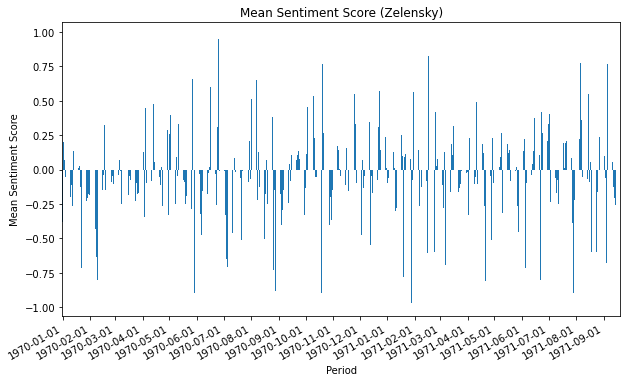

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_output is your DataFrame with a 'date' column and a 'sentiment_score' column

# Convert 'date' to datetime format (if not already)
df_output['date'] = pd.to_datetime(df_output['date'])

# Group by 'date' and calculate the mean of 'sentiment_score'
dfg = df_output.groupby(['date'])['sentiment_score'].mean()

# Create a bar plot
ax = dfg.plot(kind='bar', title='Mean Sentiment Score (Zelensky)', ylabel='Mean Sentiment Score', xlabel='Period', figsize=(10, 6))

# Setting x-axis ticks to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis date labels

plt.gcf().autofmt_xdate()  # Auto-format the x-axis date labels for better readability

plt.show()

<AxesSubplot:title={'center':'sentiment_score (Zelensky)'}, xlabel='Affiliation', ylabel='Mean Sentiment Score'>

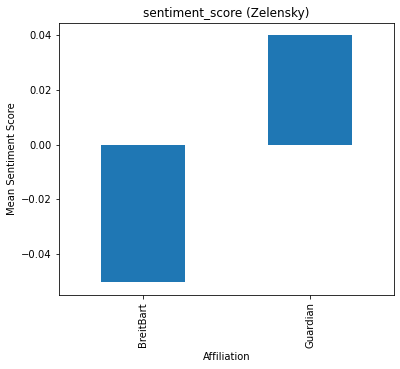

In [18]:
dfg = df_output.groupby(['affiliation'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score (Zelensky)', ylabel='Mean Sentiment Score',
         xlabel='Affiliation', figsize=(6, 5))

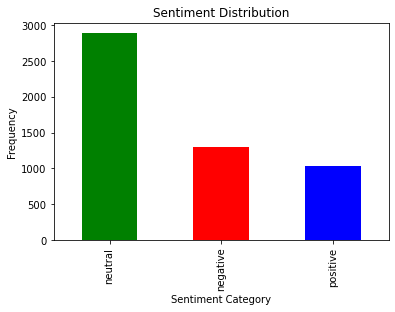

In [19]:
import matplotlib.pyplot as plt

# Assuming df_output is your DataFrame with a 'sentiment_score' column
# and you've already applied the 'categorize_sentiment' function to create a 'sentiment' column

# Count the occurrences of each sentiment category
sentiment_counts = df_output['sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')

# Show the plot
plt.show()

## Putin

In [35]:
# Function to extract sentences with the word 'John'
def extract_sentences_with_putin(row):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', row['Text'])
    sentences_with_putin = [sentence for sentence in sentences if 'Putin' in sentence]
    return pd.Series({'date': row['Datetime'], 'affiliation': row['Affiliation'], 'sentence': sentences_with_putin})

# Apply the function to each row
result_df_p = df.apply(extract_sentences_with_putin, axis=1).explode('sentence').reset_index(drop=True)

# Drop rows with NaN values
result_df_p = result_df_p.dropna()

result_df_p["row_id"] = result_df_p.index
result_df_p.head(10)

# create a new data frame with "id" and "comment" fields
df_subset_p = result_df_p[['row_id', 'sentence']].copy()
# data clean-up
# remove all non-aphabet characters
df_subset_p['sentence'] = df_subset_p['sentence'].str.replace("[^a-zA-Z#]", " ")
# covert to lower-case
df_subset_p['sentence'] = df_subset_p['sentence'].str.casefold()
df_subset_p

/var/folders/nv/900170jd77g07hdgq0vvdx300000gn/T/ipykernel_4853/255664388.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset_p['sentence'] = df_subset_p['sentence'].str.replace("[^a-zA-Z#]", " ")


,row_id,sentence
8,8,vladimir putin s spy agencies are not all seei...
13,13,they indicate that he had rightwing leanings w...
15,15,vladimir putin has made anti terrorism a corne...
17,17,suppose you are discussing syria and cyber att...
18,18,now imagine a meeting with putin on the issue ...
...,...,...
38590,38590,much has happened in our relations during thi...
38591,38591,this was achieved owing to the wise policy of...
38592,38592,the joint statement offered no specifics on an...
38593,38593,saudi arabian crown prince mohammed bin salman...


In [36]:
df_subset_p

,row_id,sentence
8,8,vladimir putin s spy agencies are not all seei...
13,13,they indicate that he had rightwing leanings w...
15,15,vladimir putin has made anti terrorism a corne...
17,17,suppose you are discussing syria and cyber att...
18,18,now imagine a meeting with putin on the issue ...
...,...,...
38590,38590,much has happened in our relations during thi...
38591,38591,this was achieved owing to the wise policy of...
38592,38592,the joint statement offered no specifics on an...
38593,38593,saudi arabian crown prince mohammed bin salman...


In [37]:
# set up empty dataframe for staging output
df1 = pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [38]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
# remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
# remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0      76       compound           0.2732
0      77       compound           0.0000
0     101       compound           0.4767
0     102       compound           0.0000
0     135       compound           0.4588
0     148       compound           0.0000
0     149       compound          -0.5267
0     215       compound           0.0000
0     217       compound           0.0000
0     233       compound          -0.4215


In [39]:
# merge dataframes
df_output = pd.merge(result_df, t_df_cleaned, on='row_id', how='inner')
df_output.head()

,date,affiliation,sentence,row_id,sentiment_type,sentiment_score
0,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...,76,compound,0.2732
1,2021-10-29,Guardian,I’m asking regional authorities to wake up and...,77,compound,0.0000
2,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...,101,compound,0.4767
3,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...,102,compound,0.0000
4,2021-12-07,Guardian,Direct engagement with the administration of V...,135,compound,0.4588


In [40]:
# function to categorize sentiment
def categorize_sentiment(score):
    if score > 0.5:
        return 'positive'
    elif score < -0.5:
        return 'negative'
    else:
        return 'neutral'

# Apply the categorize_sentiment function to create a new 'sentiment' column
df_output['sentiment'] = df_output['sentiment_score'].apply(categorize_sentiment)

# Display the result
df_output

,date,affiliation,sentence,row_id,sentiment_type,sentiment_score,sentiment
0,2021-10-29,Guardian,“I’m strongly asking you to switch off social ...,76,compound,0.2732,neutral
1,2021-10-29,Guardian,I’m asking regional authorities to wake up and...,77,compound,0.0000,neutral
2,2021-11-16,Guardian,Photograph: Gerardo Vieyra/NurPhoto/REX/Shutte...,101,compound,0.4767,neutral
3,2021-11-16,Guardian,“We have passed the peak of this wave” of the ...,102,compound,0.0000,neutral
4,2021-12-07,Guardian,Direct engagement with the administration of V...,135,compound,0.4588,neutral
...,...,...,...,...,...,...,...
5221,2023-12-07,BreitBart,President Zelensky dispatched his chief of sta...,17727,compound,-0.8020,negative
5222,2023-12-07,BreitBart,"In a full court press, President Zelensky sent...",17728,compound,0.0000,neutral
5223,2023-12-07,BreitBart,"However, Texas Republican Senator John Cornyn ...",17729,compound,-0.1027,neutral
5224,2023-12-07,BreitBart,"Orbán, who has been a lone voice in the bloc c...",17730,compound,-0.8360,negative


In [41]:
# Take a sample of articles to read
df_output_samples = df_output.sample(n = 250)
df_output_samples.to_excel('sent_put_output_samples.xlsx')

<AxesSubplot:title={'center':'sentiment_score (Putin)'}, xlabel='Affiliation', ylabel='Mean Sentiment Score'>

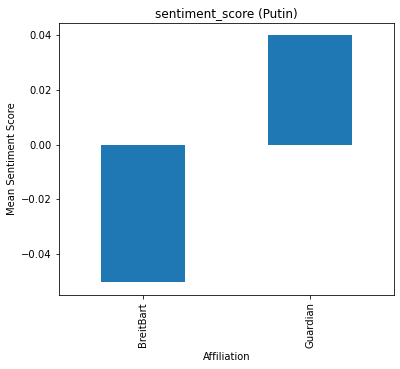

In [42]:
dfg = df_output.groupby(['affiliation'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score (Putin)', ylabel='Mean Sentiment Score',
         xlabel='Affiliation', figsize=(6, 5))

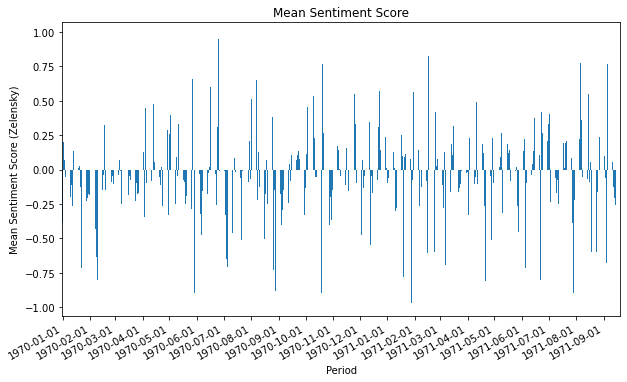

In [28]:
# Convert 'date' to datetime format (if not already)
df_output['date'] = pd.to_datetime(df_output['date'])

# Group by 'date' and calculate the mean of 'sentiment_score'
dfg = df_output.groupby(['date'])['sentiment_score'].mean()

# Create a bar plot
ax = dfg.plot(kind='bar', title='Mean Sentiment Score', ylabel='Mean Sentiment Score (Zelensky)', xlabel='Period', figsize=(10, 6))

# Setting x-axis ticks to show every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format the x-axis date labels

plt.gcf().autofmt_xdate()  # Auto-format the x-axis date labels for better readability

plt.show()

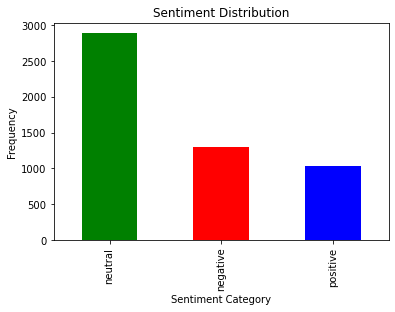

In [29]:
import matplotlib.pyplot as plt

# Assuming df_output is your DataFrame with a 'sentiment_score' column
# and you've already applied the 'categorize_sentiment' function to create a 'sentiment' column

# Count the occurrences of each sentiment category
sentiment_counts = df_output['sentiment'].value_counts()

# Plot the bar chart
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Add labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')

# Show the plot
plt.show()


## Krippendorfs alpha
sent_put_output_samples

In [30]:
from sklearn.metrics import cohen_kappa_score

In [31]:
df_putin_samples = pd.read_excel('sent_put_output_samples.xlsx')
df_putin_samples.head()

,Unnamed: 0,date,affiliation,sentence,row_id,sentiment_type,sentiment_score,sentiment
0,685,2023-08-09,Guardian,"On July 30, Ukrainian President Volodymyr Zele...",8991,compound,-0.7184,negative
1,515,2023-02-11,Guardian,President @ZelenskyyUa and I visited the Emba...,6941,compound,-0.8360,negative
2,3644,2023-02-21,BreitBart,"President Joe Biden, right, and Ukrainian Pres...",15314,compound,-0.8176,negative
3,576,2023-05-13,Guardian,We must make every effort to return them home....,8014,compound,0.1531,neutral
4,1329,2022-02-24,BreitBart,This is a declaration of war against the whole...,11104,compound,-0.5994,negative


In [32]:
# Extract the two columns to lists
rater1_list = df_putin_samples['Bernie'].tolist()
rater2_list = df_putin_samples['Lam-Vi'].tolist()

# Compute Krippendorff's alpha using sklearn's cohen_kappa_score
alpha = cohen_kappa_score(rater1_list, rater2_list)

print(f"Krippendorff's Alpha: {alpha}")

KeyError: 'Bernie'

In [ ]:
df_zel_samples = pd.read_excel('sent_zel_output_samples.xlsx')
df_zel_samples.head()

In [ ]:
# Extract the two columns to lists
rater1_list = df_zel_samples['Bernie'].tolist()
rater2_list = df_zel_samples['Lam-Vi'].tolist()

# Compute Krippendorff's alpha using sklearn's cohen_kappa_score
alpha = cohen_kappa_score(rater1_list, rater2_list)

print(f"Krippendorff's Alpha: {alpha}")